C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


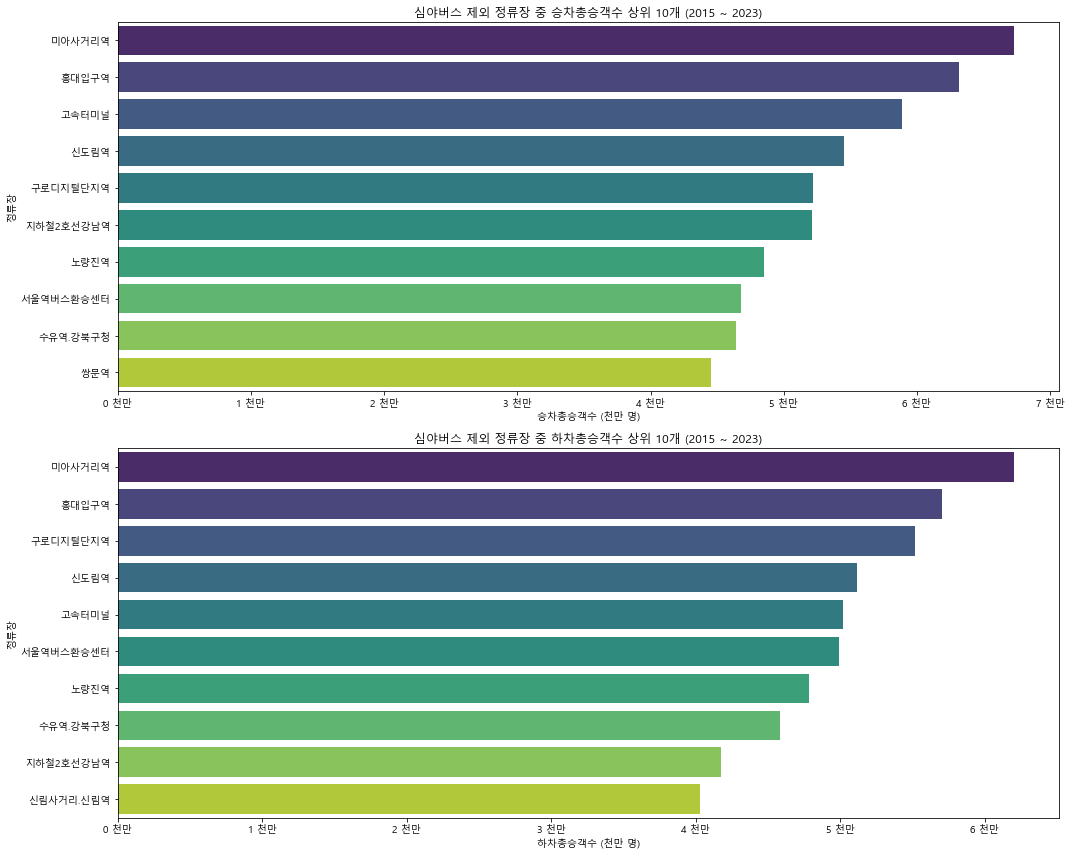

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\User\Desktop\BigData\Dataset\AllBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_BusData.csv' for year in range(2015, 2024)]

# 모든 데이터프레임을 담을 리스트 초기화
df_list = []

# 파일 읽어와서 리스트에 추가
for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 정류장 이름에서 괄호와 숫자 제거
merged_df['역명'] = merged_df['역명'].str.replace(r'\(\d+\)', '', regex=True)

# 'N'으로 시작하는 노선을 제외하고 승차총승객수와 하차총승객수가 가장 높은 정류장 10개 추출
non_n_routes = merged_df[~merged_df['노선번호'].astype(str).str.startswith('N')]
top_stations_boarding = non_n_routes.groupby('역명')['승차총승객수'].sum().nlargest(10).reset_index()
top_stations_alighting = non_n_routes.groupby('역명')['하차총승객수'].sum().nlargest(10).reset_index()

# 시각화
plt.figure(figsize=(15, 12))

# 천만 단위로 표기되게 하는 함수
def million_formatter(x, pos):
    return f'{x / 1e7:.0f} 천만'

# 첫 번째 시각화 - 승차총승객수
plt.subplot(2, 1, 1)
sns.barplot(x='승차총승객수', y='역명', data=top_stations_boarding, palette='viridis')
plt.title('심야버스 제외 정류장 중 승차총승객수 상위 10개 (2015 ~ 2023)')
plt.xlabel('승차총승객수 (천만 명)')
plt.ylabel('정류장')
plt.gca().xaxis.set_major_formatter(FuncFormatter(million_formatter))

# 두 번째 시각화 - 하차총승객수
plt.subplot(2, 1, 2)
sns.barplot(x='하차총승객수', y='역명', data=top_stations_alighting, palette='viridis')
plt.title('심야버스 제외 정류장 중 하차총승객수 상위 10개 (2015 ~ 2023)')
plt.xlabel('하차총승객수 (천만 명)')
plt.ylabel('정류장')
plt.gca().xaxis.set_major_formatter(FuncFormatter(million_formatter))

plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


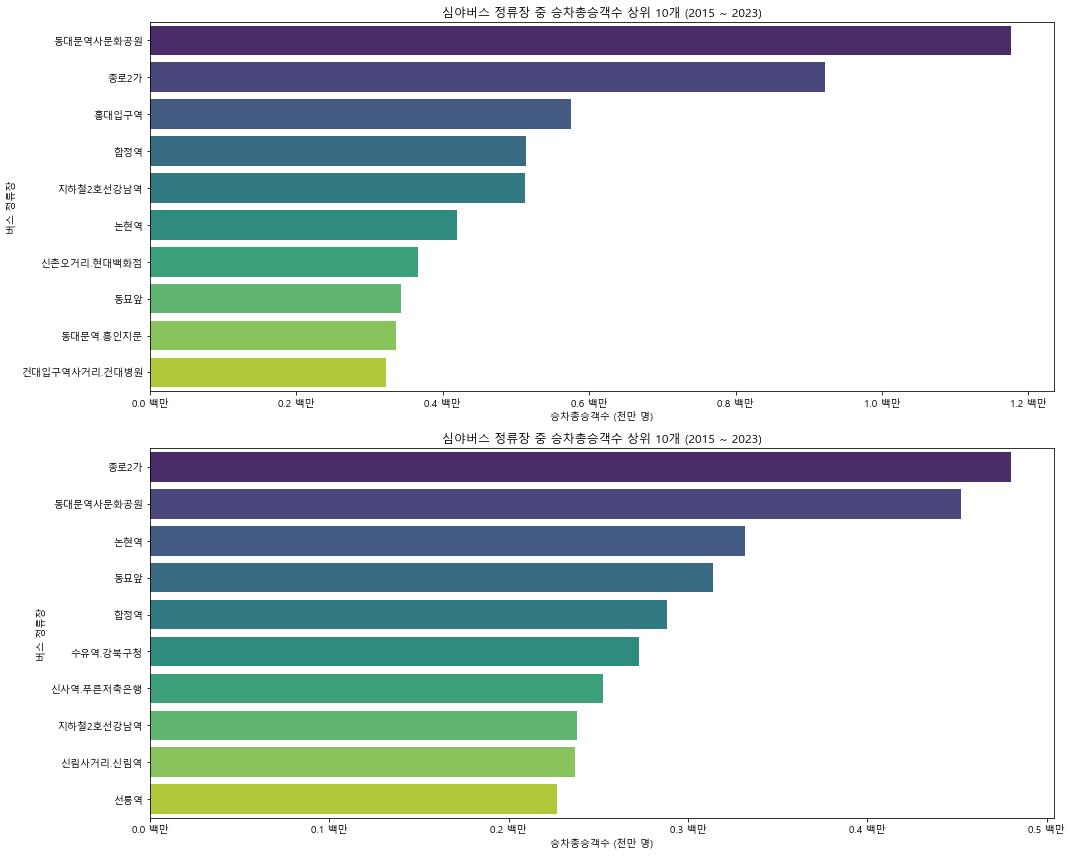

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\User\Desktop\BigData\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

# 모든 데이터프레임을 담을 리스트 초기화
df_list = []

# 파일 읽어와서 리스트에 추가
for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 정류장 이름에서 괄호와 숫자 제거
merged_df['역명'] = merged_df['역명'].str.replace(r'\(\d+\)', '', regex=True)

# 승차 총승객수를 기준으로 그룹화하고 합산
top_boarding_stations = merged_df.groupby('역명')['승차총승객수'].sum().sort_values(ascending=False).head(10)

# 하차 총승객수를 기준으로 그룹화하고 합산
top_alighting_stations = merged_df.groupby('역명')['하차총승객수'].sum().sort_values(ascending=False).head(10)

# 서브 플롯을 사용하여 시각화
plt.figure(figsize=(15, 12))

# 백만 단위로 표기되게 하는 함수
def million_formatter(x, pos):
    return f'{x / 1e6:.1f} 백만'

# 승차 총승객수
plt.subplot(2, 1, 1)
sns.barplot(x=top_boarding_stations.values, y=top_boarding_stations.index, palette='viridis')
plt.title('심야버스 정류장 중 승차총승객수 상위 10개 (2015 ~ 2023)')
plt.xlabel('승차총승객수 (천만 명)')
plt.ylabel('버스 정류장')
plt.gca().xaxis.set_major_formatter(FuncFormatter(million_formatter))

# 하차 총승객수
plt.subplot(2, 1, 2)
sns.barplot(x=top_alighting_stations.values, y=top_alighting_stations.index, palette='viridis')
plt.title('심야버스 정류장 중 승차총승객수 상위 10개 (2015 ~ 2023)')
plt.xlabel('승차총승객수 (천만 명)')
plt.ylabel('버스 정류장')
plt.gca().xaxis.set_major_formatter(FuncFormatter(million_formatter))

plt.tight_layout()
plt.show()


C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


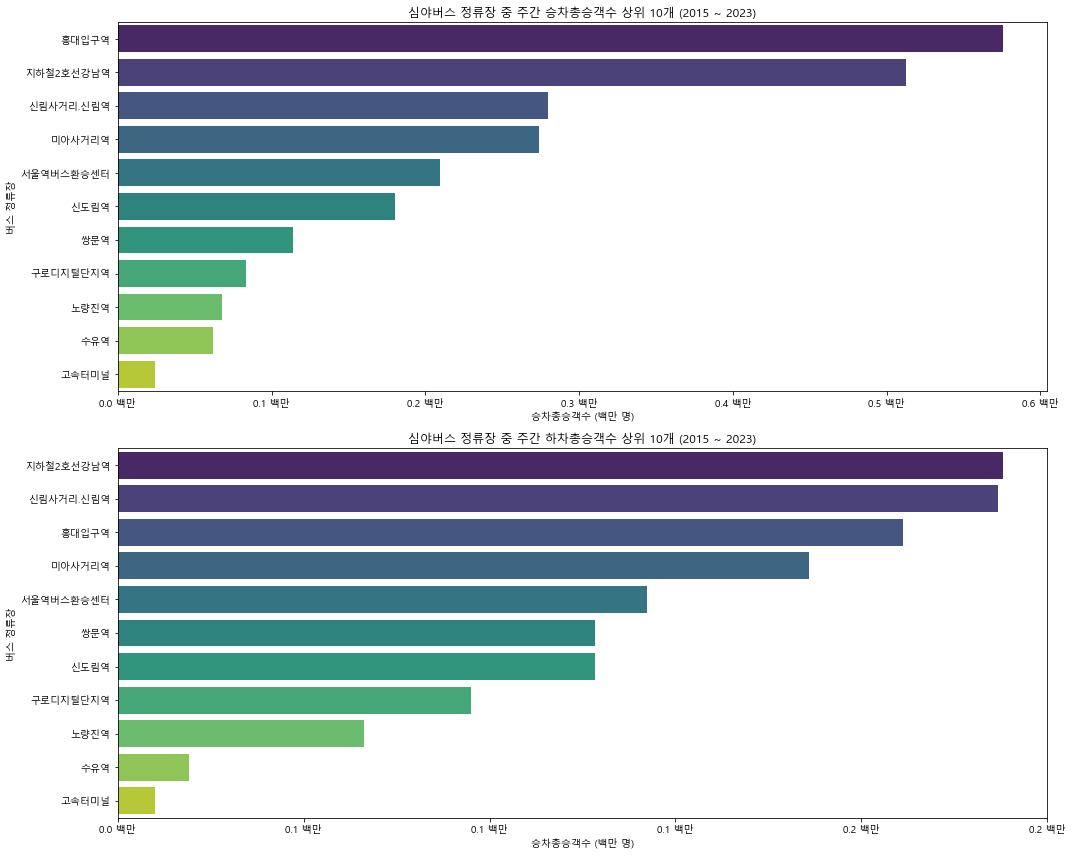

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\User\Desktop\BigData\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

# 모든 데이터프레임을 담을 리스트 초기화
df_list = []

# 파일 읽어와서 리스트에 추가
for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 정류장 이름에서 괄호와 숫자 제거
merged_df['역명'] = merged_df['역명'].str.replace(r'\(\d+\)', '', regex=True)

# 선택한 정류장 리스트
selected_stations = [
    '미아사거리역', '홍대입구역', '고속터미널', '신도림역', '구로디지털단지역',
    '지하철2호선강남역', '노량진역', '서울역버스환승센터', '수유역', '강북구청',
    '쌍문역', '신림사거리.신림역'
]

# 선택한 정류장들만 필터링
selected_df = merged_df[merged_df['역명'].isin(selected_stations)]

# 승차 총승객수를 기준으로 그룹화하고 합산
top_boarding_stations = selected_df.groupby('역명')['승차총승객수'].sum().sort_values(ascending=False)

# 하차 총승객수를 기준으로 그룹화하고 합산
top_alighting_stations = selected_df.groupby('역명')['하차총승객수'].sum().sort_values(ascending=False)

# 서브 플롯을 사용하여 시각화
plt.figure(figsize=(15, 12))

# 백만 단위로 표기되게 하는 함수
def million_formatter(x, pos):
    return f'{x / 1e6:.1f} 백만'

# 승차 총승객수
plt.subplot(2, 1, 1)
sns.barplot(x=top_boarding_stations.values, y=top_boarding_stations.index, palette='viridis')
plt.title('심야버스 정류장 중 주간 승차총승객수 상위 10개 (2015 ~ 2023)')
plt.xlabel('승차총승객수 (백만 명)')
plt.ylabel('버스 정류장')
plt.gca().xaxis.set_major_formatter(FuncFormatter(million_formatter))

# 하차 총승객수
plt.subplot(2, 1, 2)
sns.barplot(x=top_alighting_stations.values, y=top_alighting_stations.index, palette='viridis')
plt.title('심야버스 정류장 중 주간 하차총승객수 상위 10개 (2015 ~ 2023)')
plt.xlabel('승차총승객수 (백만 명)')
plt.ylabel('버스 정류장')
plt.gca().xaxis.set_major_formatter(FuncFormatter(million_formatter))

plt.tight_layout()
plt.show()
